#### Tertiary Postprocessing Suite

Combining data from an ensemble of directories into a single figure or compuation.

In [ ]:
%load_ext autoreload

%autoreload 2

from itertools import product
from lucifex.fdm import NumericSeries, GridSeries
from lucifex.io import find_dataset, filter_by_parameters, co_proxy

DATASET = find_dataset(repo='CarbonDissolution', data='_data/convection_reaction', include='Ra=*')

from co2_dissolution_pkg.post.co_plot import *
from co2_dissolution_pkg.post.compute import *

PARAMETERS = 'PARAMETERS.txt'
FUNCTION_SERIES = 'FunctionSeries.h5'
CONSTANT_SERIES = 'ConstantSeries.h5'
GRID_SERIES = 'GridSeries.npz'
NUMERIC_SERIES = 'NumericSeries.npz'
POSTPROCESS = 'PostProcess'
FIGURES = 'figures'

sr = (0.1, 0.05, 0.2)
Ra = (600, 800, 1000)
Da = (100, 500, 1000)
h0 = 0.9
Ly = 1.0
Ra_Da = [dict(Ra=i, Da=j, h0=h0, Ly=Ly) for i, j in product(Ra, Da)]

datasubset = filter_by_parameters(DATASET.directories, PARAMETERS, Ra_Da)

#### Exploratory Postprocessing

In [ ]:
# from co2_dissolution_pkg.math.contour import *
from co2_dissolution_pkg.post.compute import *
from co2_dissolution_pkg.post.plot import *
from co2_dissolution_pkg.post.co_plot import *
from lucifex.io import *

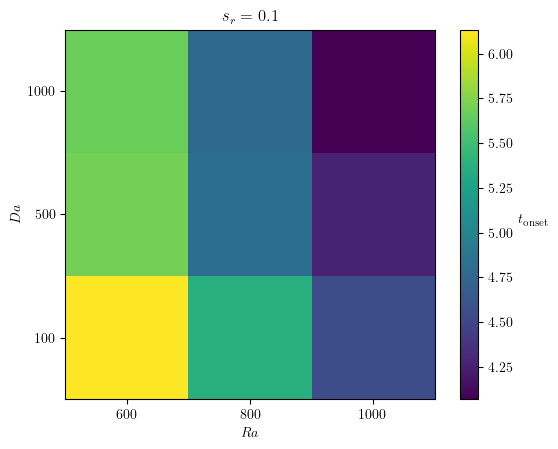

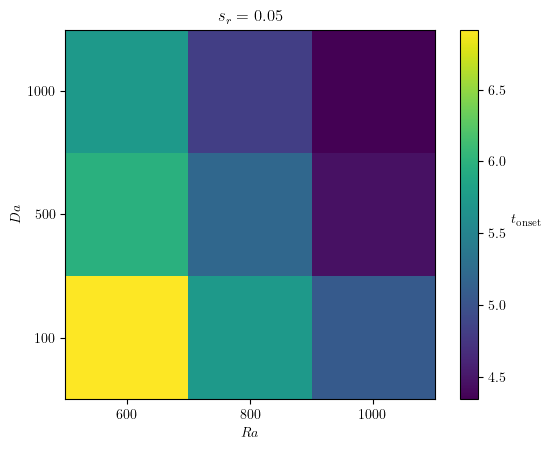

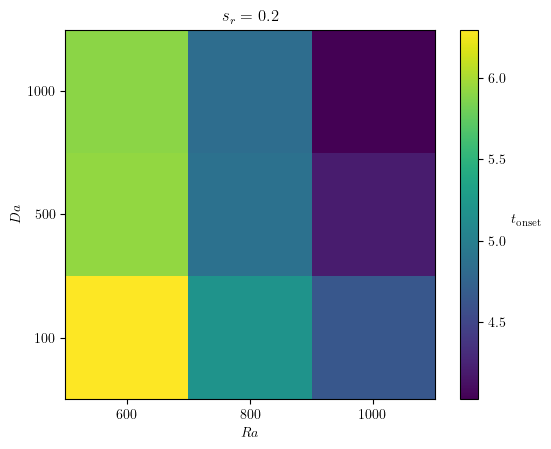

: 

In [ ]:
# onset time vs. (Ra, Da) at fixed sr

def make_param(Ra: float, Da: float) -> tuple[float, float]:
    return Ra, Da

eps_onset = 0.01
def make_t_onset(umax: NumericSeries):
    t_onset, *_ = compute_events_umax(umax, eps_onset, eps_onset)
    return t_onset

for s in sr:
    directories = filter_by_parameters(datasubset, PARAMETERS, dict(sr=s))
    fig_name = f'tOnset(Ra={Ra},Da={Da},sr={s})'.replace(' ','')
    co_plot_scalars(directories)(
        co_proxy(make_t_onset, ('umax', NumericSeries, NUMERIC_SERIES)),
        co_proxy(make_param, [('Ra', float, PARAMETERS), ('Da', float, PARAMETERS)]),
        cbar=f'$t_{{\mathrm{{onset}}}}$',
        title=f'$s_r={s}$',
        x_label='Ra',
        y_label='Da',
    )

In [ ]:
# number of plumes vs. (Ra, Da) at fixed sr
 
t = 8.0
alpha = 0.2
adaptive = False
def make_plume_number(
    c: GridSeries,
) -> int:
    Np = compute_plume_number(c, (t - 1, t + 1), alpha=alpha, adaptive=adaptive)
    time_index = as_index(Np.time_series, t)
    return Np.series[time_index]

for s in sr:
    directories = filter_by_parameters(datasubset, PARAMETERS, dict(sr=s))
    fig_name = f'nPlume(t={t};Ra={Ra},Da={Da},sr={s})'.replace(' ','')
    co_plot_scalars(directories)(
        co_proxy(make_plume_number, ('c', GridSeries, GRID_SERIES)),
        co_proxy(make_param, [('Ra', float, PARAMETERS), ('Da', float, PARAMETERS)]),
        cbar=f'$N^{{\downarrow}}(t={t})$',
        title=f'$s_r={s}$',
        x_label='Ra',
        y_label='Da',
    )

#### Established Postprocessing

In [ ]:
# mosaic of horizontally-averaged concentrations
 
n_cols = 3

for s in sr:
    directories = filter_by_parameters(datasubset, PARAMETERS, dict(sr=s))
    print(f'sr={s}: {len(directories)}/{len(datasubset)} directories from the full dataset.')
    make_titles = lambda *RaDa: [f'$(Ra, Da, s_r)=({ra}, {da}, {s})$' for ra, da in RaDa]
    fig_name = f'<c>(y,t;Ra={Ra},Da={Da},sr={s})'.replace(' ','')
    co_plot_horizontal_average_mosaic(directories, fig_name, FIGURES)(
        co_proxy(('c', GRID_SERIES)),
        [20] * len(directories),
        n_cols,
        co_proxy(make_titles, (float, 'Ra', PARAMETERS), (float, 'Da', PARAMETERS)),
        x_lims=(0, 1),
        y_lims=(0, 1),
        aspect=1.0,
    )

In [ ]:
# mosaic of horizontally-averaged saturations
 
n_cols = 3

for s in sr:
    directories = filter_by_parameters(datasubset, PARAMETERS, dict(sr=s))
    print(f'sr={s}: {len(directories)}/{len(datasubset)} directories from the full dataset.')
    make_titles = lambda *RaDa: [f'$(Ra, Da, s_r)=({ra}, {da}, {s})$' for ra, da in RaDa]
    fig_name = f'<s>(y,t;Ra={Ra},Da={Da},sr={s})'.replace(' ','')
    co_plot_horizontal_average_mosaic(directories, fig_name, FIGURES)(
        co_proxy(('s', GRID_SERIES)),
        [20] * len(directories),
        n_cols,
        co_proxy(make_titles, (float, 'Ra', PARAMETERS), (float, 'Da', PARAMETERS)),
        x_lims=(0, s),
        y_lims=(h0 - 0.5*(Ly - h0), Ly),
        aspect=1.0,
    )

In [ ]:
# mosaic of concentrations at fixed time
times = (2.0, 4.0, 8.0, 10.0, 15.0, 30.0, 50.0, 80.0)
n_cols = 3

for s in sr: 
    directories = filter_by_parameters(datasubset, PARAMETERS, dict(sr=s))
    print(f'sr={s}: {len(directories)}/{len(datasubset)} directories from the full dataset.')
    make_titles = lambda *RaDa: [f'$(Ra, Da, sr)=({ra}, {da}, {s})$' for ra, da in RaDa]
    for t in times:
        colorbar = (0, 1)
        suptitle = f'c(x,y,t={t:.2f})'
        fig_name = f'c(x,y,t={t};Ra={Ra},Da={Da},sr={s})_colorbar={colorbar}'.replace(' ','')
        co_plot_colormaps_mosaic(directories, fig_name, FIGURES)(
            co_proxy(('c', GRID_SERIES)),
            t,
            colorbar,
            n_cols,
            co_proxy(make_titles, (float, 'Ra', PARAMETERS), (float, 'Da', PARAMETERS)),
            suptitle,

        )


In [ ]:
# mosaic of saturations at fixed time
times = (2.0, 4.0, 8.0, 10.0, 15.0, 30.0, 50.0, 80.0)
n_cols = 3

for s in sr: 
    directories = filter_by_parameters(datasubset, PARAMETERS, dict(sr=s))
    print(f'sr={s}: {len(directories)}/{len(datasubset)} directories from the full dataset.')
    make_titles = lambda *RaDa: [f'$(Ra, Da, sr)=({ra}, {da}, {s})$' for ra, da in RaDa]
    for t in times:
        colorbar = (0, s)
        make_ylims = lambda h0, Ly: (h0, Ly)
        suptitle = f's(x,y,t={t:.2f})'
        fig_name = f's(x,y,t={t};Ra,Da,sr={s})_colorbar={colorbar}'.replace(' ','')
        co_plot_colormaps_mosaic(directories, fig_name, FIGURES)(
            co_proxy(('s', GRID_SERIES)),
            t,
            colorbar,
            n_cols,
            co_proxy(make_titles, (float, 'Ra', PARAMETERS), (float, 'Da', PARAMETERS)),
            suptitle,
            y_lims=co_proxy(make_ylims, (float, 'h0', PARAMETERS), (float, 'Ly', PARAMETERS)),
        )

In [ ]:
from lucifex.io import load_value

def make_legend(
    directories: list[str],
    *parameters: str,
) -> tuple[list[str], str]:
    """
    Returns `labels: list[str]` and `title: str`
    """
    labels = []
    for d in directories:
        values = [load_value(p, d, PARAMETERS) for p in parameters]
        label = ', '.join(str(v) for v in values)
        labels.append(label)
    if len(parameters) == 1:
        title = parameters[0]
    else:
        title = f"({', '.join(parameters)})"
    return labels, title

# maximum velocity
co_plot_timeseries(directories)(
    co_proxy((NumericSeries, 'umax', NUMERIC_SERIES)),
    *make_legend(directories, 'Ra', 'Da'),
    y_label = TeX.ABS_MAX_X('u'),
)